## Esau-Williams Presolver example

*EW_presolver* was developed specifically to warm-start MILP solvers. It takes in the available edges graph **A** and outputs the solution topology **S**, which can be used directly as an initial solution (as long as the model has branched topology and allows for at least the same number of feeders as **S** uses - e.g. unlimited feeders).

If a routeset is desired, use *PathFinder*.

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.heuristics import EW_presolver
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.pathfinding import PathFinder
from optiwindnet.interarraylib import G_from_S

### Load Hollandse Kust Zuid

In [2]:
locations = load_repository()

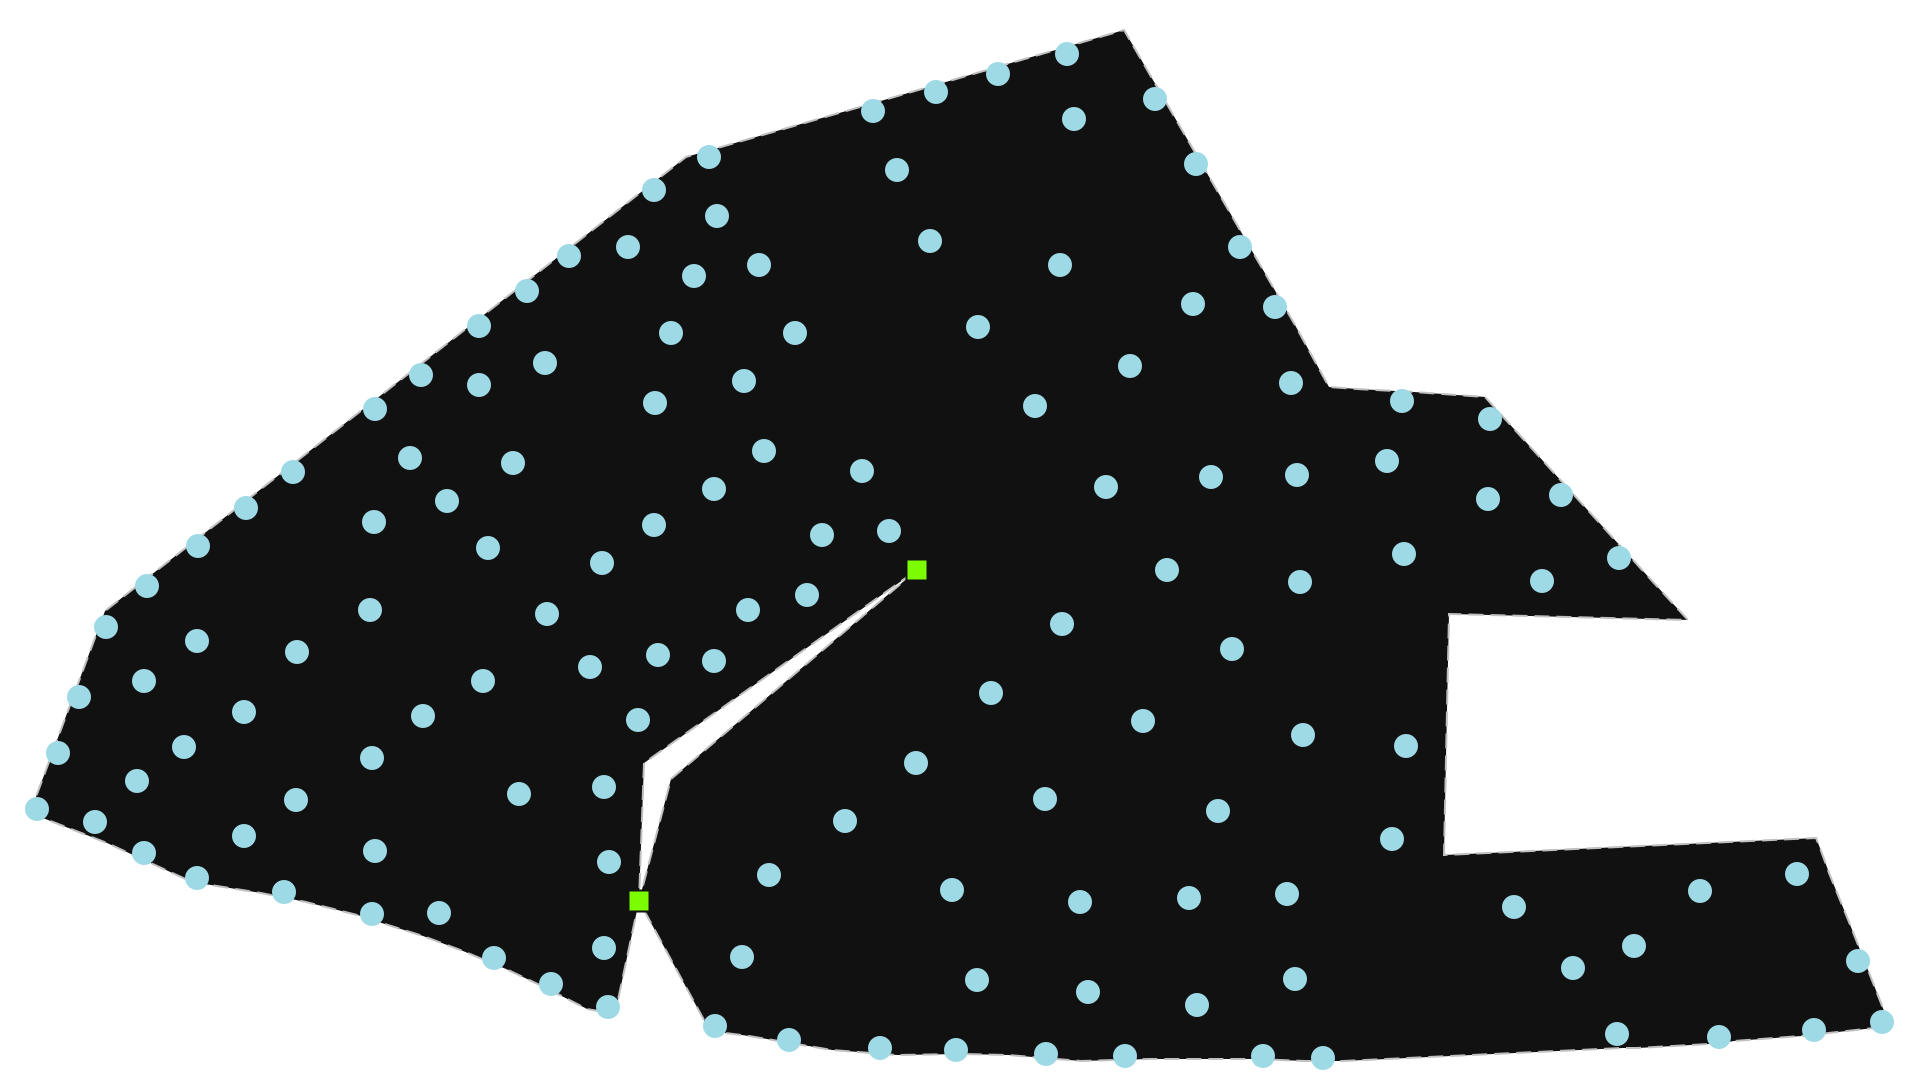

In [3]:
L = locations.kustzuid
svgplot(L)

### Optimize Hollandse Kust Zuid

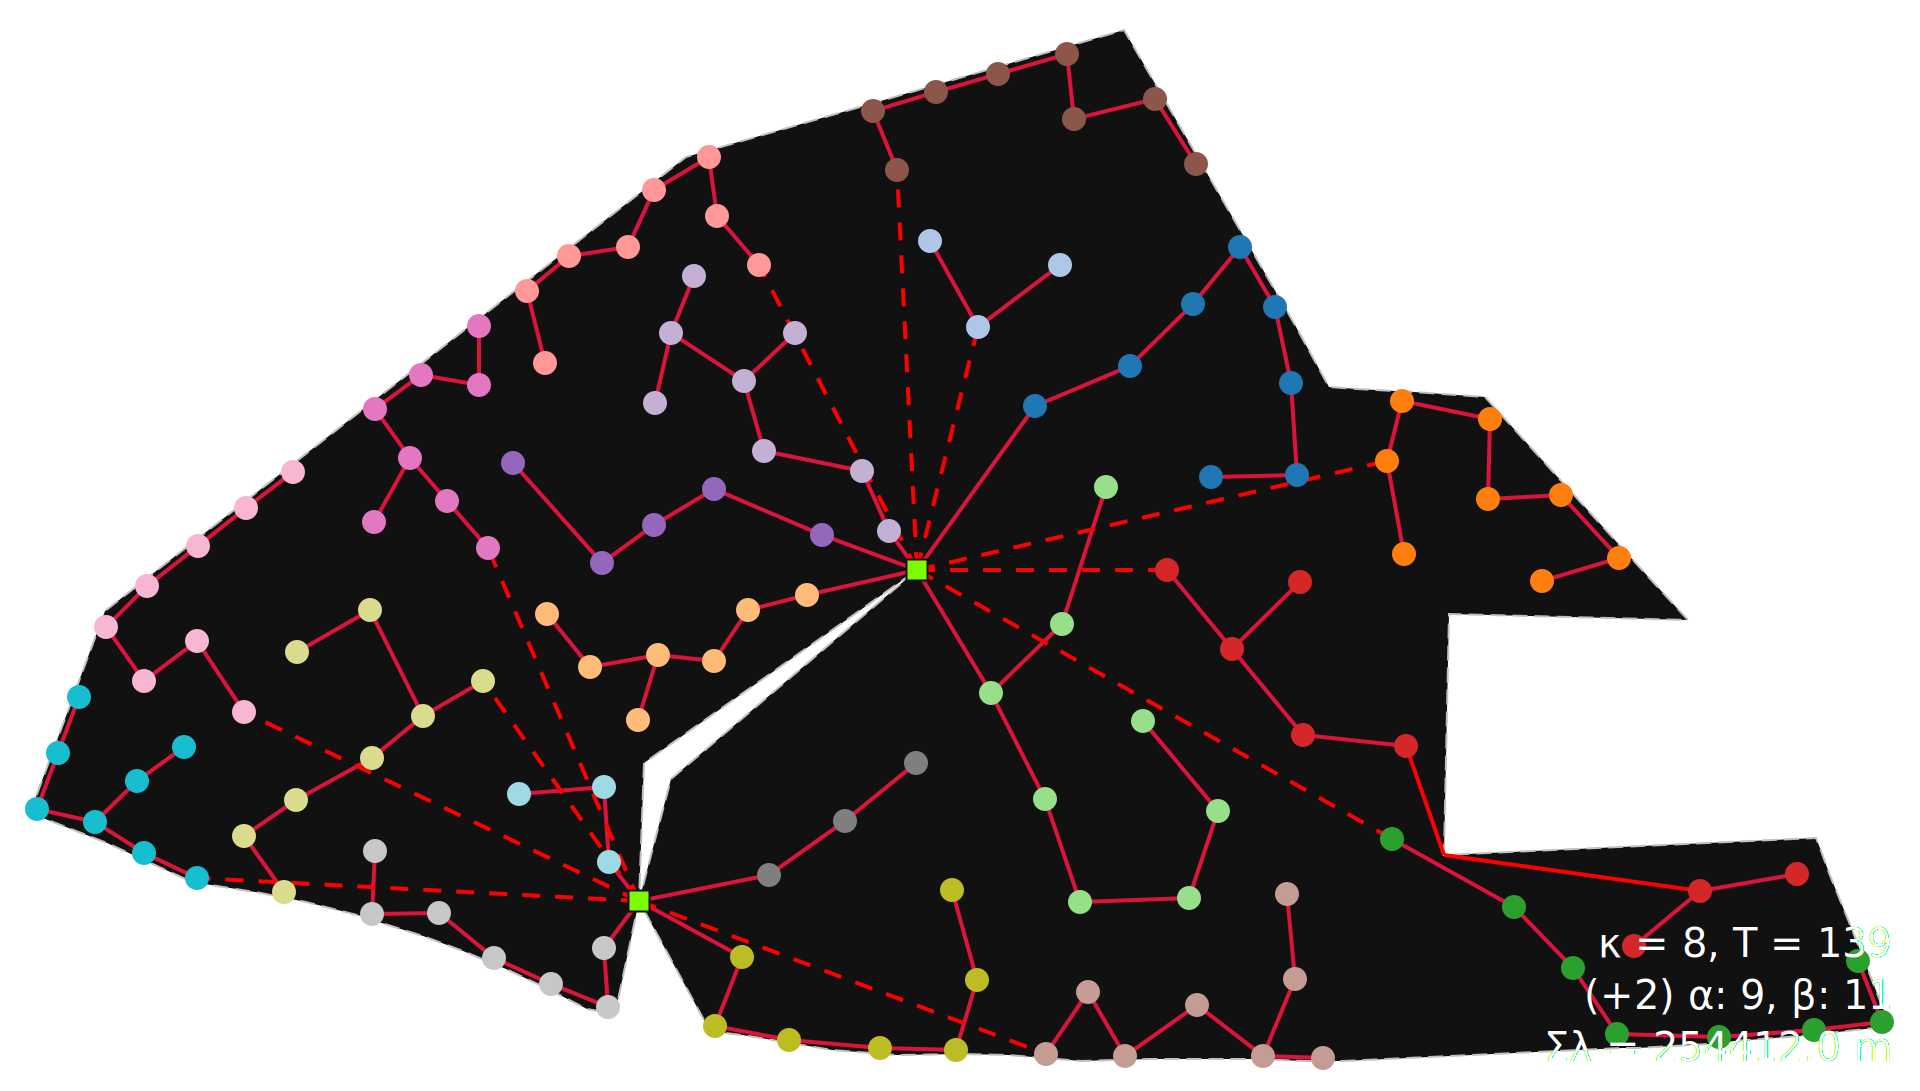

In [4]:
P, A = make_planar_embedding(L)
S = EW_presolver(A, capacity=8)
G = G_from_S(S, A)
svgplot(G)

## Route the feeders so as to avoid crossings

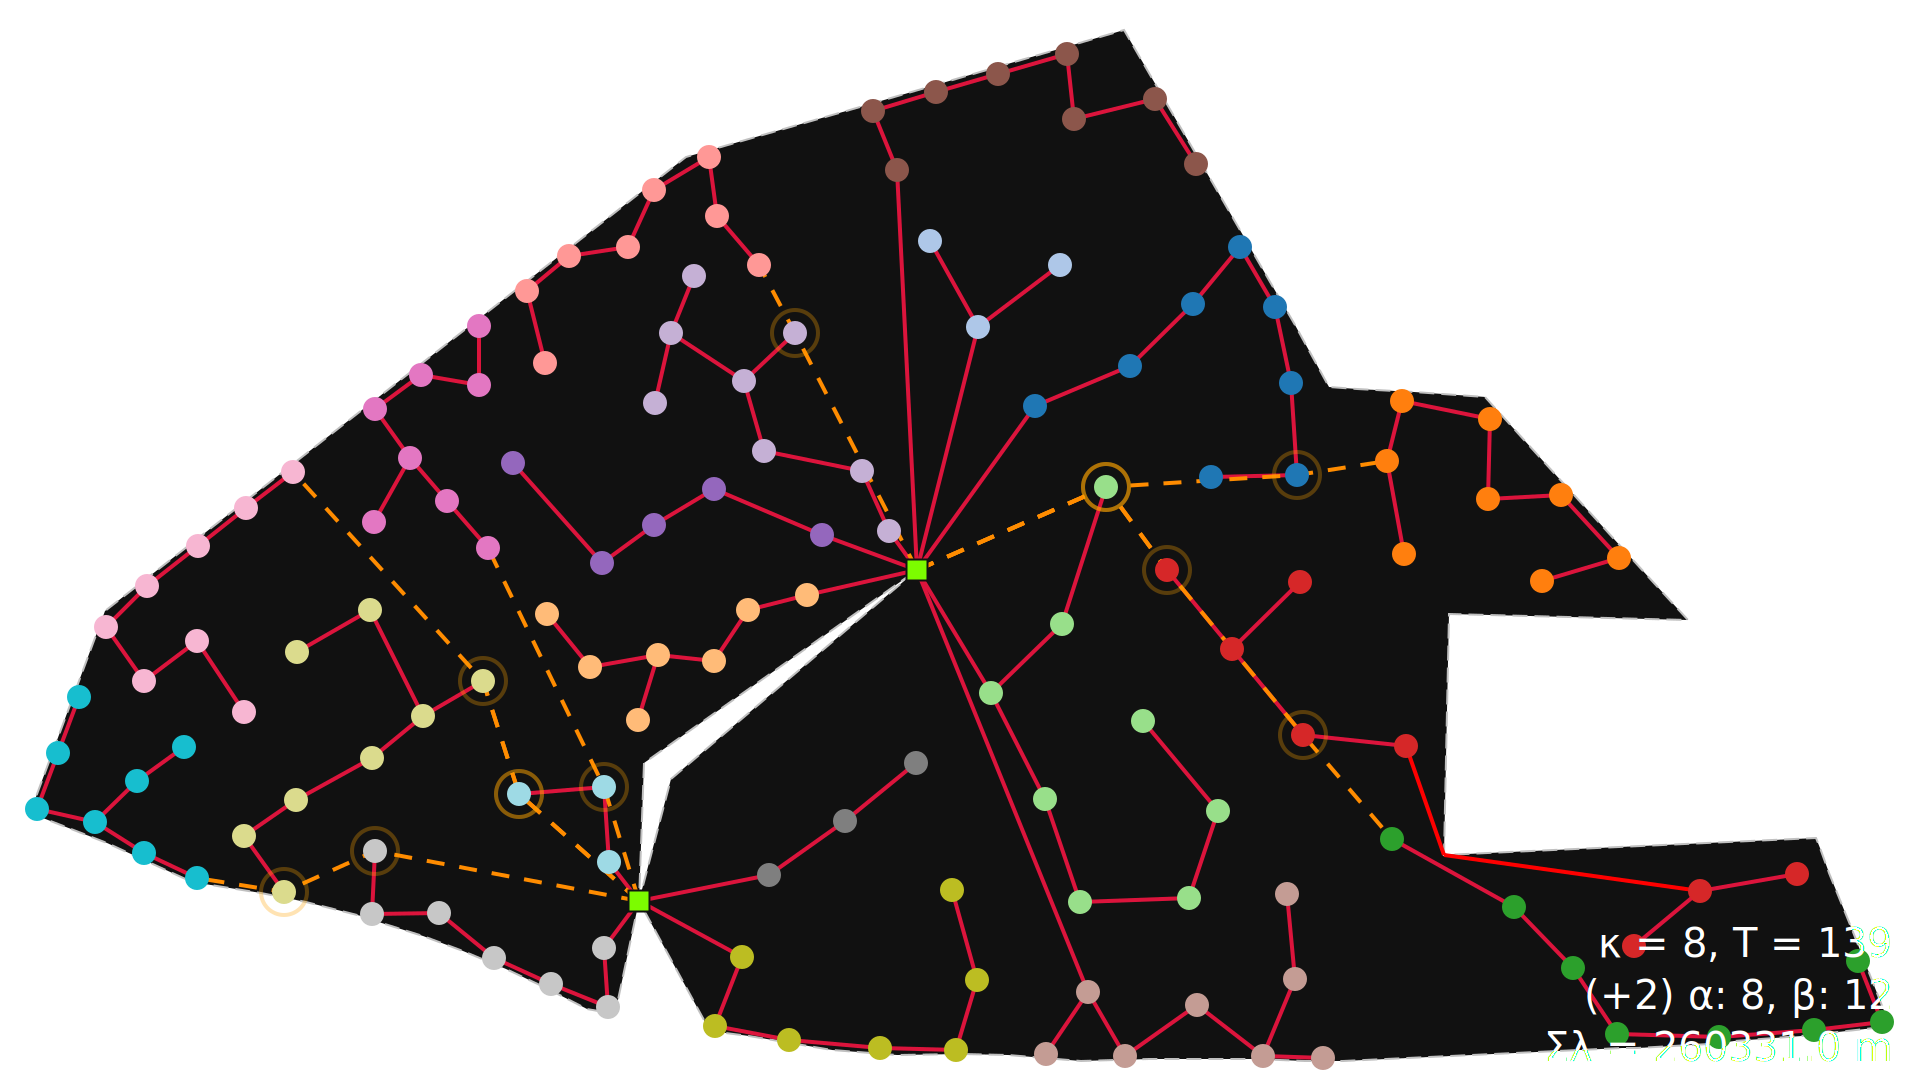

In [5]:
H = PathFinder(G, P, A).create_detours()
svgplot(H)